In [3]:
pip install opencv-python

   ---------------------------------------- 0.0/39.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.0 MB ? eta -:--:--
   -----------------

In [4]:
import cv2
import os 
import matplotlib.pyplot as plt

In [7]:
image = cv2.imread('./image/fundus_0001.png', 0)

(array([25882.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0., 14097.,     0.,     0.,
            0.,     0.,     0.,     0.,  4310.,   757.,   745.,   466.,
          728.,   554.,   628.,     0.,   691.,   789.,   867.,     0.,
         1025.,  1126.,     0.,  1414.,     0.,     0.,  1604.,     0.,
            0.,  2013.,     0.,     0.,     0.,  2298.,     0.,     0.,
            0.,  2713.,     0.,     0.,     0.,     0.,  3018.,     0.,
            0.,     0.,     0.,  3014.,     0.,     0.,     0.,  3014.,
            0.,     0.,     0.,  2739.,     0.,     0.,     0.,  2513.,
            0.,     0.,     0.,  2134.,     0.,  1819.,     0.,     0.,
         1368.,  1205.,     0.,   901.,   731.,   628.,  1037.,   396.,
          803.,   564.,   763.,   646.]),
 array([  0.  ,   2.55,   5.1 ,   7.65,  10.2 ,  12.75,  15.3 ,  17.85,
         20.4 ,  22.95

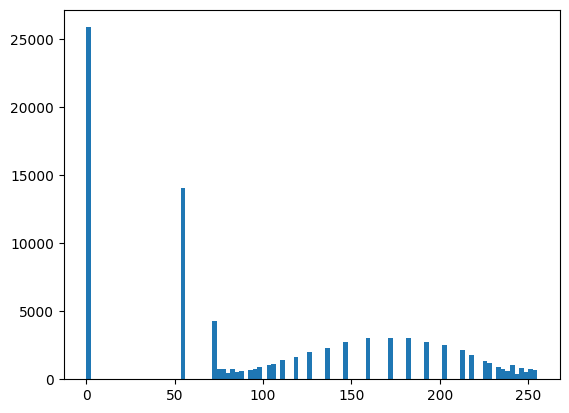

In [11]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl_image = clahe.apply(image)
eq_image = cv2.equalizeHist(image)
plt.hist(eq_image.flat, bins=100, range=(0, 255))

In [ ]:
# thresholding func
def applyCLAHE(image):
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    cl_image = clahe.apply(image)

    return cl_image

In [ ]:
# main block
